<div style="text-align: right">INFO 6105 Data Science Eng Methods and Tools, Lecture 13, Day 1</div>
<div style="text-align: right">Prof. Dino Konstantopoulos, 1 December 2020, with material by Juan H. Klopper and all Monopoly enthusiasts</div>

# 1. Linear Algebra Review

###  Linear Transformations

Linear algebra is the study of linear transformations on **vectors**, which represent points in a finite dimensional space.  The matrix-vector product $y = A x$ is a linear combination of the columns of $A$:

$$ y_i = \sum_j A_{i,j} x_j $$

### Eigenvectors, Eigenvalues

Given $A \in \mathbb{R}^{n\times n}$, $\lambda$ is the **eigenvalue** of $A$ if there is a non-zero vector $x$, the corresponding **eigenvector**, such that the following is true:

$$Ax = \lambda x, \;\; \text{for} \; x \neq 0$$

Formally, given a square matrix $A \in \mathbb{R}^{n\times n}$, we say that $\lambda \in \mathbb{C}$ is an **eigenvalue** of $A$ and $x \in \mathbb{C}^n$ is the corresponding **eigenvector**.

Intuitively, this definition means that multiplying $A$ by the vector $x$ results in a new vector that points in the *same* direction as $x$, but is scaled by a factor $\lambda$.

If we think of a matrix $A$ as a **movement matrix**, taking a mountain climber from one position to another, then the eigenvectors of that matrix are the positions on the mountain such that the move will take you to a new position vector that is *parallel* to the old position vector.

Last class we introduced *fundamentals of linear algebra* that will be required to become an ML programmer, and a very important theorem of linear algebra: *The dominant eigenvector is the only unsuppressed contribution in the steady-state regime of a Markov chain*. That is because all others have eigenvlues less than one, whose higher powers in repeated transitions of the system by multiplication with its transfer matrix will take the contribution of their associated eigenvector to zero.

We then applied this theorem to a *graph*: Finding the dominant eigenvector of the graph's transition matrix in order to locate the *most popular* node, which is node our silver surfer will visit the most often if he surds the graph at the speed of light.

We can find the dominant eigenvector by solving the silver surfer equation *exactly* using linear algebra calculus ($n$ equations in $n$ unknowns) if the graph is *small*, or using the **power method** if the graph is big, like the WWW (which is what google did to rank the web).

Then you have to do the same exercise for another graph, for thursday.

Going from the **adjacency matrix** of a graph to its **transfer matrix** is pretty simple: divide the adjacency matrix by the out-degree of each node.

When I tried to plot the *entire* adjacency matrix of a graph, it gave me the idea of ascii art :-)

This lecture, we look at the math *in more detail*.

### Eigenvalues and eigenvectors in scipy

`scipy` has a good amount of linear algebra functionality. Which library to pick, `numpy` or `scipy`? *Your* choice.

In [1]:
import numpy as np
import scipy as sp
import scipy.linalg as la

We are going to attempt to solve for

$$A r = v r$$

where A is the matrix, and $r$ represents the *right* eigenvectors, while $v$ represents the eigenvalues. 

In [3]:
A = np.array([[1,2,3],[4,5,6],[7,8,9]])  # Defining the array 

(val, vec) = la.eig(A, left = False) # You can read the help, buy the left eigenvectors don't get created without this. 
print(val)
print()
print(vec)

[ 1.61168440e+01+0.j -1.11684397e+00+0.j -1.30367773e-15+0.j]

[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]


### A very strange result:

In [10]:
print(la.inv(vec)@A@vec)
print()
d = sp.diag(val)  # by default, eig puts the eigenvalues in a 1-D array. We will need a diagonal matrix in a moment.
print(d)

[[ 1.61168440e+01  3.24990953e-15  1.56847703e-15]
 [-2.35717857e-15 -1.11684397e+00 -1.03745896e-16]
 [ 2.92975267e-15  1.51850608e-16  1.60237371e-31]]
[[ 1.61168440e+01+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j]
 [ 0.00000000e+00+0.j -1.11684397e+00+0.j  0.00000000e+00+0.j]
 [ 0.00000000e+00+0.j  0.00000000e+00+0.j -9.75918483e-16+0.j]]


We'll get back to this...

### *in-class exercise*: 

Replace $A$ with a random matrix from a Normal distribution and find eigenvectors/eigenvalues. For example:

In [11]:
np.random.randn(4, 4)

array([[-0.13875643,  1.34269373,  1.10585579, -0.23022824],
       [-1.2239757 ,  0.7620301 , -1.49538613, -1.37875633],
       [-0.43158279, -1.08116671, -0.68729811,  3.17720467],
       [ 1.49439238,  0.11107164,  0.95702325, -0.11094053]])


### Markov Chains

A **Markov chain** is any *memoryless* (step $t$ depends only on step $t-1$) process that can be modeled with a *stochastic transition* matrix.

<br />
<center>
<img src = ipynb.images/moody.png width = 600 />
    Moody's credit rating transitions
</center>
<br />


### Repeated transitions

>**Conjecture**: If the transition matrix $P$ is the same after each step (time homogeneous), then the k-step transition probability is.. the k-th power of the transition matrix, $P^k$.

Let's think about 2-step transitions, first.

Since the transitions are *independent*, the probability of state $a$ transitioning into state $b$ and then from state $b$ into state $c$ is just the product $p_{c←b}$ $p_{b←a}$. 

We know this from our probability notebooks, right?

The probability of a transitioning into c via any *intermediate* state b is just the sum of those products over all possibilities b:

$$p_{c←a} = p_{c←1}p_{1←a} + p_{c←2}p_{2←a} + \cdots = \sum_b p_{c←b}p_{b←a}$$

And that... is *exactly* matrix multiplication!!!

So matrix multiplication represents a one-timestep transition of a state machine, where states are described as vectors in state space.

Thus the 2-step transition is characterized by the matrix $A$ x $A$ = $A^2$.

Since the 3-step transition is 1-step transition times a 2-step transition, it is characterized by the matrix $A$ x $A^2$ = $A^3$.

And so, the n-step transition is characterized by the matrix $A^n$.

<br />
<center>
<img src="ipynb.images/minion-banana.png" width=200 />
</center>

### Steady state limit
Now what if, in the long term, after many powers of $n$, we suddenly transition to a condition where states don't change very much at all. We acheive what is called a **steady-state** condition: 

$$P^{\;k+1} = P^{\;k}$$

It's as if our mountain climber, after repeated similar moves, essentially stops moving and stays at the same location, *for ever*.

Is that even possible? Sure it is, find the position that is the dominant eigenvector for the matrix $P$ :-)

Stationary distributions are super-interesting to Wall Street, because they describe *the future*! 

There is a theorem in game theory called the [fixed point theorem](https://en.wikipedia.org/wiki/Fixed-point_theorem), which says that under some conditions any function $f$, even if non linear, provided it is *smooth enough*, will have a fixed point. 

In other words, there exists an $x$ such that:

<br />
<br />
$$ f(x) = x$$

That piece of mathematics has led to some very interesting computer science, such as [Nash equilibria](https://en.wikipedia.org/wiki/Nash_equilibrium), named after the late mathematician John Forbes Nash Jr., who proposed solution of a non-cooperative game involving two or more players in which each player is assumed to know the equilibrium strategies of the other players, and is nicely acted by Russel Crow in the movie [A Beautiful Mind](https://en.wikipedia.org/wiki/A_Beautiful_Mind_(film)).

Here's one interesting application of this theorem:

<center>
<img src="ipynb.images/crumpled-city-boston-map-5.gif" width=300/>
</center>

### Now, for a bit of math..
Define the matrices $P$ and $D$ composed of eigenvectors and eigenvalues:

<br />
<center>
<img src = "ipynb.images/pd.png" width = 400 />
</center>
<br />

Then:

<br />
<center>
<img src = "ipynb.images/appd.png" width = 400 />
</center>
<br />

And if:

$$ A P = P D$$

Then:

$$ A = P D P^{-1}$$

So, any matrix can be written as the product of a matrix $P$ whose columns are composed of its eigenvectors, times the matrix composed of its eigenvalues in the main diagonal, times the inverse of $P$.

Neat, so what?

### So What?!

Did you say "so what"? Take the power of that equation:

$$ A^2 = P D P^{-1} .  P D P^{-1} = P D . P^{-1} P . D P^{-1} = P D . D P^{-1} = P D^2 P^{-1} $$

And if you keep doing this many times, you will see that:

$$ A^n = P D^n P^{-1} $$

Now, go back to the beginning of the notebook, at our strange computation.

Not so strange anymore, ey? :-)

So, just compute $D^n$ and you can find the *any-number-of-timesteps* transition matrix of **any Markov chain**, as long as you can find its eigenvectors and eigenvalues!. 

How to compute $D^n$? It is just the matrix with the n-powers of the eigenvalues in the main diagonal! $P$ and $P^{-1}$ have no powers, so they're *easy* to compute if you have the eigenvalues of $A$:

<br />
<center>
<img src = "ipynb.images/dn.png" width = 150 />
</center>
<br />

### A surprising result

So, if $n$ is a large number, what happens to $\lambda^n$? 

What happens if $\lambda < 1$, and what happens if $\lambda > 1$?

Is it possible that $\lambda$ is bigger than 1? Does $A^n$ remain *stochastic*?

And what if all $\lambda_i$ are less than one?

So what does this tell you?

Just think about eigenvectors and eigenvalues. 
Imagine that we are able to represent the initial state of a system as a linear combination of eigenvectors of the transition matrix $P$ (just a *change of bases*). To find the probability distribution of states after $n$ transitions, we multiply this vector by P, $n$ times, right? Each application of P adds a factor of the eigenvalue $λ$ to the coefficient of each eigenvector in the expansion of the state. Recall: The eigenvectors don’t transform much.. They just squish or expand (by a factor of $λ$). So after $n$ transitions, the coefficient of each eigenvector has gained a factor $λ^n$.

If λ > 1, this factor would grow without bound as $n$ increases, leading to matrix elements larger than 1, which would ruin the probability interpretation of our state vector..
So, there must not be any eigenvalue larger than one!

If λ < 1, this factor would suppress the contribution of the corresponding eigenvector as $n$ increases. It’s fine if this happens to some eigenvectors, but if it happens to *all of them*, the probability interpretation of our state vector would also be ruined, because all entries in our vector would be driven to zero..

So, what's your conclusion? 

### The dominant eigenvector

The dominant eigenvector (eigenvector corresponding to the eigenvalue = 1) of any Markov chain *is* the steady-state limit (the future) of the Markov chain!

The dominant eigenvector will become the only unsuppressed contribution to the state vector as $n$ gets large.
This eigenvector therefore represents the steady-state towards which every linear system tends to.
Stochastic matrices are guaranteed to have eigenvalues not larger than one, and to have *at least* one eigenvalue equal to one
The components of the dominant eigenvector are proportional to the relative occupation probabilities of states in the long run.

Now we didn't prove that a Markov chain *has* a steady state, or that it is unique. *Only* that *if* there is a steady state, *and* it is unique, then it is given by the dominant eigenvector. 

But actually, for Markov chains, there is indeed only one so-called *fixed point* (steady-state). That is why Markov chains are so interesting and sexy. And for the math, go back [here](https://en.wikipedia.org/wiki/Fixed-point_theorem).

And that is why we can find the most popular node in a graph by locating its dominant eigenvector.

That is why google can give you the most relevant web site for your search term by finding the dominant Web page :-)

That *proves* all our results from our last notebook!

Let's look at another application of thois today: **game theory**.

To look at long term gaming strategies, we need to locate the **dominant eigenvector** of the game's **transition matrix**. Let's play...

# 2. Monopoly Monte Carlo

Who does not want to get rich? If you grew up in a capitalist country, you grew up playing [Monopoly](https://en.wikipedia.org/wiki/Monopoly_(game)) and getting indoctrinated to the idea of striking it *rich*. 

The funny part is that the [Fed](https://en.wikipedia.org/wiki/Federal_Reserve_System) has very explicit rules against monopolies, which it deems unfair and detrimental to the general population.

![](http://buckwolf.org/a.abcnews.com/images/Entertainment/ho_hop_go_050111_t.jpg)<center>[Rich Uncle Pennybags](https://en.wikipedia.org/wiki/Rich_Uncle_Pennybags)<br>1940&mdash; today
   
No question games are *state machines*, right? Is Monopoly a Markov chain? Is *chess* a Markov chain?

If the next position for any player only depends on the current position, it is a **Markov chain**.

In Monopoly, a player starts on the GO square and adds the scores on two 6-sided dice to determine the number of squares they advance in a clockwise direction. Without any further rules we would expect to visit each square, *eventually* with equal probability: 2.5% (40 squares in total, so $\frac{1}{40}$). However, landing on G2J (Go To Jail), CC (community chest), and CH (chance) changes this distribution.

<br />
<center>
<img src = ipynb.images/monopoly-board.jpg width = 300 />
</center>
<br />

These are the symbols, below, for each square as represented above, with Community Chest (CC), Chance (CH) and Go to Jail (G2J) squares highlighted orange:
<br />
<br />


<div style="text-align:center;">
<table cellspacing="1" cellpadding="5" border="0" style="background-color:#333333;" align="center"><tr><td style="background-color:#ffffff;">GO</td>
<td style="background-color:#ffffff;">A1</td>
<td style="background-color:#ff6347;">CC1</td>
<td style="background-color:#ffffff;">A2</td>
<td style="background-color:#ffffff;">T1</td>
<td style="background-color:#ffffff;">R1</td>
<td style="background-color:#ffffff;">B1</td>
<td style="background-color:#ff6347;">CH1</td>
<td style="background-color:#ffffff;">B2</td>
<td style="background-color:#ffffff;">B3</td>
<td style="background-color:#ffffff;">JAIL</td>
</tr><tr><td style="background-color:#ffffff;">H2</td>
<td colspan="9"> </td>
<td style="background-color:#ffffff;">C1</td>
</tr><tr><td style="background-color:#ffffff;">T2</td>
<td colspan="9"> </td>
<td style="background-color:#ffffff;">U1</td>
</tr><tr><td style="background-color:#ffffff;">H1</td>
<td colspan="9"> </td>
<td style="background-color:#ffffff;">C2</td>
</tr><tr><td style="background-color:#ff6347;">CH3</td>
<td colspan="9"> </td>
<td style="background-color:#ffffff;">C3</td>
</tr><tr><td style="background-color:#ffffff;">R4</td>
<td colspan="9"> </td>
<td style="background-color:#ffffff;">R2</td>
</tr><tr><td style="background-color:#ffffff;">G3</td>
<td colspan="9"> </td>
<td style="background-color:#ffffff;">D1</td>
</tr><tr><td style="background-color:#ff6347;">CC3</td>
<td colspan="9"> </td>
<td style="background-color:#ff6347;">CC2</td>
</tr><tr><td style="background-color:#ffffff;">G2</td>
<td colspan="9"> </td>
<td style="background-color:#ffffff;">D2</td>
</tr><tr><td style="background-color:#ffffff;">G1</td>
<td colspan="9"> </td>
<td style="background-color:#ffffff;">D3</td>
</tr><tr><td style="background-color:#ff6347;">G2J</td>
<td style="background-color:#ffffff;">F3</td>
<td style="background-color:#ffffff;">U2</td>
<td style="background-color:#ffffff;">F2</td>
<td style="background-color:#ffffff;">F1</td>
<td style="background-color:#ffffff;">R3</td>
<td style="background-color:#ffffff;">E3</td>
<td style="background-color:#ffffff;">E2</td>
<td style="background-color:#ff6347;">CH2</td>
<td style="background-color:#ffffff;">E1</td>
<td style="background-color:#ffffff;">FP</td>
</tr></table></div>

<br />

In addition to G2J, and one card from each of CC and CH that orders the player to go directly to jail, if a player rolls three consecutive doubles, they do not advance the result of their 3rd roll. Instead they proceed directly to jail! Too much luck can be a bad thing (when you roll a double, you get to roll again). 

At the beginning of the game, the CC and CH cards are shuffled. When a player lands on CC or CH they take a card from the top of the respective pile and, after following the instructions, it is returned to the bottom of the pile. There are sixteen (16) cards in each pile, but for the purpose of this problem we are only concerned with cards that order a movement; any instruction not concerned with movement will be ignored and the player will remain on the CC/CH square.

    Community Chest (2/16 cards):
        Advance to GO
        Go to JAIL
        
    Chance (10/16 cards):
        Advance to GO
        Go to JAIL
        Go to C1
        Go to E3
        Go to H2
        Go to R1
        Go to next R (railway company)
        Go to next R (railway company)
        Go to next U (utility company)
        Go back 3 squares.


We need to take into account die rolls, chance and community chest cards, and going to jail (from the "go to jail" space, from a card, or from rolling doubles three times in a row). We do not need, for now, to take into account anything about buying or selling properties or exchanging money or winning or losing the game, because these don't change a player's location. But we will take into account the value of each square by looking at the price to buy it, and the rent you can charge if any other player lands on it. 

All players start the game with an equal amount of money. Obviously, a good strategy for the game is to buy as many high-rent low-priced properties as possible, right? Also, we will assume that a player in jail will always pay to get out of jail immediately. 

A game of Monopoly can go on forever, so the sample space in time (a ticker of all possible trajectories through the squares, in time) is *infinite*. Even if we limit the sample space to say, 1000 rolls, there are $21^{1000}$ such sequences of rolls (1-1, 1-2, 1-3, 1-4, 1-5, 1-6, 2-2, 2-3, 2-4, 2-5, 2-6, 3-3, 3-4, 3-5, 3-6, 4-4, 4-5, 4-6, 5-5, 5-6, 6-6, and even more possibilities when we consider drawing cards). So it is infeasible to explicitly represent that sample space. 

But it is fairly straightforward to implement a simulation and run it for, say, 400,000 rolls (so the average square will be landed on 10,000 times).

Moreover, we *can* represent the sample space of all possible positions per player, *at any moment in time*, since there are only 40 squares. We say that the state space for each player has 40 dimensions. Since each player changes state (position on the board) with a die roll, the game of Monopoly is essentially a 40-state **state machine**.

Monopoly is a *memoryless* game (the next position for any player only depends on the current position and the die roll), so a **Markov chain**. All theorems about Markov chains apply. Specifically, there is a **unique fixed point in state space**, and it is the *long-term behavior* of the game. In other words, if you play the game with an infinite anount of die rolls, there is a specific square you will land on *an infinite amount of times*. Figuring out that square is the holy grail of Monopoly game strategy. But also the strategy of any other Markovian game, and there are *many* such games in las Vegas casinos, such as [blackjack](https://www.imdb.com/title/tt0478087/)...

<br />
<center>
<img src = ipynb.images/21.jpg width = 150 />
</center>
<br />

Let's play.

### Monopoly Probability Density function

Let's compute the pdf of the Monopoly game, where the sample space consists of the 40 squares. This game is a great introduction to coroutines (generators) in python, functions with the **yield** controlled return.

Here's the board:
```(python)
from collections import Counter, deque
import random

# The board: a list of the names of the 40 squares
# As specified by https://projecteuler.net/problem=84
board = """GO   A1 CC1 A2  T1 R1 B1  CH1 B2 B3
           JAIL C1 U1  C2  C3 R2 D1  CC2 D2 D3 
           FP   E1 CH2 E2  E3 R3 F1  F2  U2 F3 
           G2J  G1 G2  CC3 G3 R4 CH3 H1  T2 H2""".split()
```

Here's the game:
```(python)
def monopoly(steps):
    """Simulate given number of steps of Monopoly game, 
    yielding the number of the current square after each step."""
    goto(0) # start at GO
    CC_deck = Deck('GO JAIL' + 14 * ' ?')
    CH_deck = Deck('GO JAIL C1 E3 H2 R1 R R U -3' + 6 * ' ?')
    doubles = 0
    jail = board.index('JAIL')
    for _ in range(steps):
        d1, d2 = random.randint(1, 6), random.randint(1, 6) # roll die
        goto(here + d1 + d2)  # here is a global variable, so gets initialized to 0. It's modulo-40
        doubles = (doubles + 1) if (d1 == d2) else 0
        if doubles == 3 or board[here] == 'G2J':  
            goto(jail)
        elif board[here].startswith('CC'):
            do_card(CC_deck)
        elif board[here].startswith('CH'):
            do_card(CH_deck)
        yield here  # yield ensures monopoly() returns a *list* of positions. Also, allows to resume where we left off       
```

And here are some utility functions:
```(python)


def goto(square):
    "Update the global variable 'here' to be square."
    global here
    here = square % len(board)
                   
def Deck(names):
    "Make a shuffled deck of cards, given a space-delimited string."
    cards = names.split()
    random.shuffle(cards)
    return deque(cards)    # double-ended queue, so can remove/add to the head or tail of the queue     

def do_card(deck):
    "Take the top card from deck and do what it says."
    global here
    card = deck[0]             # The top card
    deck.rotate(-1)            # Move top card to bottom of deck
    if card == 'R' or card == 'U': 
        while not board[here].startswith(card):
            goto(here + 1)     # Advance to next railroad or utility
    elif card == '-3':
        goto(here - 3)         # Go back 3 spaces
    elif card != '?':
        goto(board.index(card))# Go to destination named on card
```

Let's do a simulation of 400,000 die rolls and plot the results:

In [288]:
results = list(monopoly(400000))

In [290]:
import pandas as pd
pd.DataFrame(results[0:100]).T

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,3,5,10,16,23,34,39,9,15,20,...,18,24,31,38,4,13,5,12,21,25


And the pdf of our sample space by plotting a histogram of the squares (with a dotted red line at the average):

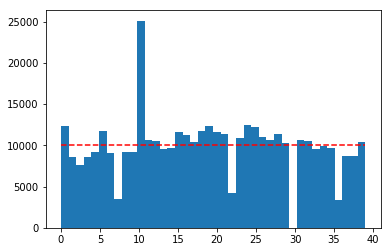

In [291]:
%matplotlib inline 
import matplotlib.pyplot as plt

plt.hist(results, bins=40)
avg = len(results) / 40
plt.plot([0, 39], [avg, avg], 'r--');

Boy, we go to JAIL.. **a lot**! More than double the average.

We never land on space[30] == G2J because that warps us to JAIL immediately.

Also note how CH1, CH2, and CH3 are occupied only about a third of the average, because chance cards tend to warp us elesewhere.

Hey wait a sec, we implemented a probability counting framework, right? Let's import it and put it to use!

In [6]:
from fractions import Fraction

def P(pred, dst): 
    "Proba that pred is true, given the dst pdf"
    return sum(dst[e] for e in dst if pred(e))

class ProbabilityDistribution(dict):
    "A Probability Distribution; an {outcome: probability} mapping where probabilities sum to 1."
    def __init__(self, mapping=(), **kwargs):
        self.update(mapping, **kwargs)
        total = sum(self.values())
        if isinstance(total, int): 
            total = Fraction(total, 1)
        for key in self: # Make probabilities sum to 1.
            self[key] = self[key] / total
            
    def __and__(self, pred): # Call this method by writing ProbabilityDistribution & predicate
        "New ProbabilityDistribution, for outcomes of this ProbabilityDistribution for which pred is true."
        return ProbabilityDistribution({e:self[e] for e in self if pred(e)})

def Uniform(out): return ProbabilityDistribution({e: 1 for e in out})

def joint(X, Y, sep=''):
    "joint pdf of two independent pdfs. Entries of the shape {x+sep+y: P(x)*P(y)}"
    return ProbabilityDistribution({x + sep + y: X[x] * Y[y]
                    for x in X
                    for y in Y})

`Counter` just counts the elements of a list and reports the counts for each unique element. So let's count occurrences of each square in `results`. So the pdf for the sample space of 400,00 die rolls:

In [270]:
pd = ProbabilityDistribution(Counter(board[i] for i in results))
pd

{'A1': Fraction(8423, 400000),
 'A2': Fraction(2157, 100000),
 'B1': Fraction(8989, 400000),
 'B2': Fraction(4629, 200000),
 'B3': Fraction(2289, 100000),
 'C1': Fraction(11097, 400000),
 'C2': Fraction(4743, 200000),
 'C3': Fraction(4873, 200000),
 'CC1': Fraction(7637, 400000),
 'CC2': Fraction(2101, 80000),
 'CC3': Fraction(9401, 400000),
 'CH1': Fraction(413, 50000),
 'CH2': Fraction(4303, 400000),
 'CH3': Fraction(3521, 400000),
 'D1': Fraction(11137, 400000),
 'D2': Fraction(11909, 400000),
 'D3': Fraction(1523, 50000),
 'E1': Fraction(11311, 400000),
 'E2': Fraction(10871, 400000),
 'E3': Fraction(6381, 200000),
 'F1': Fraction(27, 1000),
 'F2': Fraction(269, 10000),
 'F3': Fraction(5151, 200000),
 'FP': Fraction(11559, 400000),
 'G1': Fraction(10613, 400000),
 'G2': Fraction(1049, 40000),
 'G3': Fraction(1267, 50000),
 'GO': Fraction(617, 20000),
 'H1': Fraction(4333, 200000),
 'H2': Fraction(5289, 200000),
 'JAIL': Fraction(12497, 200000),
 'R1': Fraction(751, 25000),
 'R2': F

In [271]:
pd.values()

dict_values([Fraction(12497, 200000), Fraction(11137, 400000), Fraction(10871, 400000), Fraction(269, 10000), Fraction(10613, 400000), Fraction(8663, 400000), Fraction(8989, 400000), Fraction(11097, 400000), Fraction(617, 20000), Fraction(751, 25000), Fraction(2101, 80000), Fraction(12113, 400000), Fraction(1423, 50000), Fraction(1267, 50000), Fraction(5289, 200000), Fraction(1523, 50000), Fraction(91, 3125), Fraction(2289, 100000), Fraction(11909, 400000), Fraction(27, 1000), Fraction(11311, 400000), Fraction(9401, 400000), Fraction(4629, 200000), Fraction(4743, 200000), Fraction(1937, 80000), Fraction(1049, 40000), Fraction(413, 50000), Fraction(5153, 200000), Fraction(4333, 200000), Fraction(9319, 400000), Fraction(11559, 400000), Fraction(5151, 200000), Fraction(4303, 400000), Fraction(4873, 200000), Fraction(3521, 400000), Fraction(8423, 400000), Fraction(2157, 100000), Fraction(7637, 400000), Fraction(6381, 200000)])

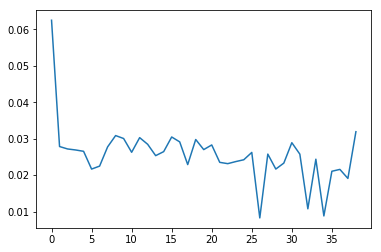

In [273]:
v = [];
for f in pd.values():
    v.append(float(f))
v
plt.plot(v)
#avg = len(results) / 40
#plt.plot([0, 39], [avg, avg], 'r--');

Note that a dictionary in Python is *always* sorted, so we start with the JAIL square. So, same conclusions as the ones examining the histogram: There is one square far above average: `JAIL`, at a little over 6%. There are three squares far below average: the three chance squares, `CH1`, `CH2`, and `CH3`, at around 1% (because 10 of the 16 chance cards send the player away from the square)(the "Go to Jail" square, isn't in the dictionary). The other squares are between 2% to 3% each, which you would expect, because 1 / 40 = 2.5%.

Ok, so now we have a handle on the game, positionally. Let's dig in deeper with profit & loss.

# 3. Monopoly's Dominant Eigenvector 

Now let's take a more mathematical approach to the game, and put to good use what we learned about the **dominant eigenvector**. 

To represent the monopoly board, we are going to build a [transition matrix](https://en.wikipedia.org/wiki/Examples_of_Markov_chains) which represents a piece's possible movements on the board based on die rolls. 

We start with a matrix and a vector or zeros:

In [4]:
board = np.zeros((40,40))
diceroll = np.zeros(40)
board

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
diceroll

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.])

How far can we advance on a board with two die? 

Can we advance by a single square? 

No, since the minimum count of a two-die roll is 1 + 1 (also called *snake eyes*). 

What's the probability of rolling snake eyes? Since each dice has 6 possibilities, the number of possibilities to divide by is 6 x 6 = 36. Since there is a single snake-eyes, that probability is $\frac{1}{36}$. Yes?

How about advancing by 3 squares, is that possible? Yes, with a 1 + 2 and a 2 + 1. Since we have two possible solutions, that probability is $\frac{2}{36}$. 

By 4 squares? Yes, with a 1 + 3, 2 + 2, and a 3 + 1. For a probability of $\frac{3}{36}$.

You can easily see for yourself that the probabilities of covering the distance represented by the index in any list is the following:

In [26]:
rolls = [0, 1, 2, 3, 4, 5, 6, 5, 4, 3, 2, 1]
for index, r in enumerate(rolls):
    diceroll[index] = r
diceroll /= 36
print(diceroll)

[0.         0.02777778 0.05555556 0.08333333 0.11111111 0.13888889
 0.16666667 0.13888889 0.11111111 0.08333333 0.05555556 0.02777778
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]


`numpy.roll(array, shift, axis = None)` rolls array elements along the specified axis. Basically what happens is that elements of the input array are being **shifted**. For example, if an element is being rolled from last-position, it is rolled back to first-position. Here are examples, using a 3 x 4 matrix:

Original array : 
 $$[[ 0  1  2  3] \\
 [ 4  5  6  7] \\
 [ 8  9 a b]]$$

Rolling with 1 shift : 
$$[[b  0  1  2] \\
 [ 3  4  5  6] \\
 [ 7  8  9 a]]$$

Rolling with 5 shift : 
 $$[[ 7  8  9 a] \\
 [b  0  1  2] \\
 [ 3  4  5  6]]$$
 
Why is this relevant? Well, since we have 40 positions in total, our transfer matrix is 40 x 40. And each entry $(i,j)$ represents the probability of advancing from position $i$ to position $j$. So if $i$ and $j$ are distant by *more* than 12, that probability is 0. Otherwise, it is given by `diceroll[:12]`.  So our transition matrix is initialized with zeros, which is a good way of giving it *shape*:

In [16]:
board

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

We can access each row $i$ of the matrix with `board[i]`, and to set each column of that row with a single vectorized operation, this is how we do it (this is just an illustrative example):

In [17]:
board[1] = 1
board

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 1., 1., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

We can also do this:

In [27]:
import pandas as pd
board[0] = diceroll
pd.DataFrame(board)

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.0,0.027778,0.055556,0.083333,0.111111,0.138889,0.166667,0.138889,0.111111,0.083333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Ok, now that we have some practice with **vectorized operations**, let's compute the `board`'s transfer matrix.

The zeroth row of our transition matrix concerns movements from square 0, and that is exactly what we computed with `diceroll`. 

Row index 1 (the second row) of our transition matrix concerns movement from square 1, and movements from square 1, which can only advance in one direction (forward, or clockwise) are the same as our `diceroll`, except that we have to roll `diceroll` forward by 1 step since the zeroth column represents an illegal move (backward or coutnerclockwise), column-1 has zero probability, and it is column-2 that has probability $\frac{1}{36}$.  

For row index 2 (third row), we roll forward by 2 steps.

Notice that our board has a circular wrap, so eventually we'll be able to get back to GO (square 0) from its left.

For row index 39 (40$^{th}$ row), we roll by 39 (or -1).

So this is our transition matrix, `board`. **Do not confuse numpy's `roll` with the roll of a die!**:

In [28]:
board = np.zeros((40,40))
for row in range(40):
    board[row] = np.roll(diceroll, row)
pd.DataFrame(board)

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.000000,0.027778,0.055556,0.083333,0.111111,0.138889,0.166667,0.138889,0.111111,0.083333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.027778,0.055556,0.083333,0.111111,0.138889,0.166667,0.138889,0.111111,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.027778,0.055556,0.083333,0.111111,0.138889,0.166667,0.138889,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.027778,0.055556,0.083333,0.111111,0.138889,0.166667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.027778,0.055556,0.083333,0.111111,0.138889,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027778,0.055556,0.083333,0.111111,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027778,0.055556,0.083333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027778,0.055556,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027778,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Ok, so that's a simplified version of our game, since it does not take into account any **warping** (moving irrespective of die rolls, *due to cards drawn from Chance squares*), and by the *go-to-jail wormhole* (that throws players over to jail). 

So.. we need to evaluate **another transfer matrix**, the one given by these picking-up-a-card transformations, which we call `chance`.

And since the overall position is determined by die-roll **followed by** a potential card draw, we then multiply the two matrices to get the real transition matrix for our system: `board` * `chance`.

Isn't linear algebra so much fun? It allows us to represent information in multi-dimensional space.

In fact, here we are still in 2D space, but eventually, we'll move to nD space, and that is where we'll start using *tensorflow*, because a tensor is an *n-dimeinsional matrix*!

But first, let's evaluate `chance` for Monopoly. Start with zeros:

In [29]:
chance = np.zeros((40,40))

In [30]:
# compute the chance transition matrix. 
# Square 30, “Go To Jail”, transitions with certainty to square 10, the jail.
# A token that lands on a community chest space sometimes 
# transitions to go and sometimes transitions to jail, but 

for c in range(40):
    if (c == 30):
        # go to jail
        chance[30, 10] = 1.0

    elif ((c == 7) or (c == 22) or (c == 36)):
        # chance

        # advance to go
        chance[c, 0] = 1.0 / 16.0
        # advance to illinois avenue
        chance[c, 24] = 1.0 / 16.0
        # take a walk on the boardwalk
        chance[c, 39] = 1.0 / 16.0
        # go to jail
        chance[c, 10] = 1.0 / 16.0
        # take a ride on the reading
        chance[c, 5] = 1.0 / 16.0
        # advance to St. Charles place
        chance[c, 11] = 1.0 / 16.0
        # go back 3 spaces
        chance[c, c - 3] = 1.0 / 16.0

        # advance token to the nearest utility
        if ((c < 12) or (c > 28)):
            chance[c, 12] = 1.0 / 16.0
        else:
            chance[c, 28] = 1.0 / 16.0

        # advance token to the nearest railroad
        if (c < 5):
            chance[c, 5] += 1.0 / 16.0
        elif (c < 15):
            chance[c, 15] = 1.0 / 16.0
        elif (c < 25):
            chance[c, 25] = 1.0 / 16.0
        elif (c < 35):
            chance[c, 35] = 1.0 / 16.0
        else:
            chance[c, 5] += 1.0 / 16.0
            
        # stay put
        chance[c, c] = 7.0 / 16.0
        
    elif ((c == 2) or (c == 17) or (c == 33)):
        # community chest

        # advance to go
        chance[c, 0] = 1.0 / 16.0
        # go to jail
        chance[c, 10] = 1.0 / 16.0
        # stay put
        chance[c, c] = 14.0 / 16.0
    
    
    else:
        chance[c, c] = 1.0
        
pd.DataFrame(chance)

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,1.0000,0.0,0.000,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0,0.0000
1,0.0000,1.0,0.000,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0,0.0000
2,0.0625,0.0,0.875,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0,0.0000
3,0.0000,0.0,0.000,1.0,0.0000,0.0000,0.0,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0,0.0000
4,0.0000,0.0,0.000,0.0,1.0000,0.0000,0.0,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0,0.0000
5,0.0000,0.0,0.000,0.0,0.0000,1.0000,0.0,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0,0.0000
6,0.0000,0.0,0.000,0.0,0.0000,0.0000,1.0,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0,0.0000
7,0.0625,0.0,0.000,0.0,0.0625,0.0625,0.0,0.4375,0.0,0.0,...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0,0.0625
8,0.0000,0.0,0.000,0.0,0.0000,0.0000,0.0,0.0000,1.0,0.0,...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0,0.0000
9,0.0000,0.0,0.000,0.0,0.0000,0.0000,0.0,0.0000,0.0,1.0,...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0,0.0000


Let's verify. c\[G2J, JAIL\] = 1.0, since when we land on G2J, we move to JAIL. So chance\[30, 10\] == 1.0 

In [31]:
chance[30,10]

1.0

Also, let's verify that `chance` is stochastic:

In [32]:
for i in range(40):
    if (np.sum(chance[i]) != 1.):
        print("non stochastic!")

Now let's compute the product of the two matrices `board` and `chance`, representing a die roll followed by the draw of a chance card *if we fall on the chance square*.

This is the stocahstic transition matrix of our game, which represents one elementary step. Repeated steps will be represented by *powers* of that matrix!

In [33]:
transition = chance @ board
pd.DataFrame(transition)

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.000000,0.027778,0.055556,0.083333,0.111111,0.138889,0.166667,0.138889,0.111111,0.083333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.027778,0.055556,0.083333,0.111111,0.138889,0.166667,0.138889,0.111111,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.001736,0.003472,0.029514,0.055556,0.081597,0.107639,0.130208,0.152778,0.126736,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.027778,0.055556,0.083333,0.111111,0.138889,0.166667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.027778,0.055556,0.083333,0.111111,0.138889,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027778,0.055556,0.083333,0.111111,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027778,0.055556,0.083333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.001736,0.005208,0.008681,0.012153,0.015625,0.020833,0.024306,0.024306,0.036458,0.048611,...,0.010417,0.008681,0.006944,0.005208,0.003472,0.001736,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027778,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


And let's verify that `transition` is stochastic:

In [34]:
for i in range(40):
    if (np.sum(transition[i]) != 1.):
        print("non stochastic: " + str(i))

non stochastic: 36


Huh? What wrong with square #36??

In [35]:
np.sum(transition[36])

0.9999999999999999

ok, close enough :-)

Sum the rows:

In [36]:
print(np.swapaxes(np.cumsum(transition,axis=1),0,1)[39])

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Ok, our matrix is **stochastic**. Whew!

Now let's compute eigenvectors and eigenvalues of `transition` to find the dominant eigenvector!

We'll use `numpy` and `scipy`, so you can see both libraries in action:

In [37]:
from numpy import linalg as la
w, v = la.eig(transition)

In [38]:
# eigenvalues
w

array([ 1.00000000e+00+0.00000000e+00j,  4.88335754e-01+6.84607753e-01j,
        4.88335754e-01-6.84607753e-01j, -2.19792081e-01+6.72478282e-01j,
       -2.19792081e-01-6.72478282e-01j, -4.23019481e-01+1.30592796e-01j,
       -4.23019481e-01-1.30592796e-01j, -2.01490496e-01+1.42021696e-01j,
       -2.01490496e-01-1.42021696e-01j, -1.55950773e-03+8.44291081e-02j,
       -1.55950773e-03-8.44291081e-02j, -5.31706935e-02+0.00000000e+00j,
       -5.14401603e-02+0.00000000e+00j, -2.72921161e-02+3.72303991e-02j,
       -2.72921161e-02-3.72303991e-02j, -1.93322158e-02+2.50417261e-02j,
       -1.93322158e-02-2.50417261e-02j,  7.76966367e-03+2.42768038e-02j,
        7.76966367e-03-2.42768038e-02j, -2.15021659e-02+1.43655869e-02j,
       -2.15021659e-02-1.43655869e-02j, -2.06686304e-02+7.02241899e-03j,
       -2.06686304e-02-7.02241899e-03j, -5.38341134e-03+1.62701795e-02j,
       -5.38341134e-03-1.62701795e-02j,  4.34367166e-03+1.31112516e-02j,
        4.34367166e-03-1.31112516e-02j, -6.80257362

See the dominant eigenvalue? Where is it?

In [39]:
# eigenvectors
v

array([[-0.15811388+0.00000000e+00j,  0.10496409+1.39956227e-01j,
         0.10496409-1.39956227e-01j, ...,  0.26760077+0.00000000e+00j,
        -0.15811388+1.70269725e-10j, -0.15811388-1.70269725e-10j],
       [-0.15811388+0.00000000e+00j,  0.07919384+1.51935191e-01j,
         0.07919384-1.51935191e-01j, ..., -0.16809542+0.00000000e+00j,
         0.15811388-2.05561875e-08j,  0.15811388+2.05561875e-08j],
       [-0.15811388+0.00000000e+00j,  0.04497866+1.56240108e-01j,
         0.04497866-1.56240108e-01j, ..., -0.14769909+0.00000000e+00j,
        -0.15811388+4.19620754e-08j, -0.15811388-4.19620754e-08j],
       ...,
       [-0.15811388+0.00000000e+00j,  0.16571705+8.00940640e-02j,
         0.16571705-8.00940640e-02j, ...,  0.17377159+0.00000000e+00j,
         0.15811388-2.57554634e-08j,  0.15811388+2.57554634e-08j],
       [-0.15811388+0.00000000e+00j,  0.14877786+1.03608109e-01j,
         0.14877786-1.03608109e-01j, ..., -0.10620287+0.00000000e+00j,
        -0.15811388-3.34793465e-09j

Just to verify, in `SciPy`:

In [40]:
import scipy.linalg as la
w2, v2 = la.eig(transition)
w2

array([ 1.00000000e+00+0.00000000e+00j,  4.88335754e-01+6.84607753e-01j,
        4.88335754e-01-6.84607753e-01j, -2.19792081e-01+6.72478282e-01j,
       -2.19792081e-01-6.72478282e-01j, -4.23019481e-01+1.30592796e-01j,
       -4.23019481e-01-1.30592796e-01j, -2.01490496e-01+1.42021696e-01j,
       -2.01490496e-01-1.42021696e-01j, -1.55950773e-03+8.44291081e-02j,
       -1.55950773e-03-8.44291081e-02j, -5.31706935e-02+0.00000000e+00j,
       -5.14401603e-02+0.00000000e+00j, -2.72921161e-02+3.72303991e-02j,
       -2.72921161e-02-3.72303991e-02j, -1.93322158e-02+2.50417261e-02j,
       -1.93322158e-02-2.50417261e-02j,  7.76966367e-03+2.42768038e-02j,
        7.76966367e-03-2.42768038e-02j, -2.15021659e-02+1.43655869e-02j,
       -2.15021659e-02-1.43655869e-02j, -2.06686304e-02+7.02241899e-03j,
       -2.06686304e-02-7.02241899e-03j, -5.38341134e-03+1.62701795e-02j,
       -5.38341134e-03-1.62701795e-02j,  4.34367166e-03+1.31112516e-02j,
        4.34367166e-03-1.31112516e-02j, -6.80257362

The dominant eigenvector:

In [41]:
v[0]

array([-1.58113883e-01+0.00000000e+00j,  1.04964093e-01+1.39956227e-01j,
        1.04964093e-01-1.39956227e-01j, -5.34183338e-02-1.54561469e-01j,
       -5.34183338e-02+1.54561469e-01j,  1.13465592e-01-1.04694121e-01j,
        1.13465592e-01+1.04694121e-01j,  3.06993174e-02-1.53928344e-01j,
        3.06993174e-02+1.53928344e-01j, -9.31224819e-02+1.36238680e-01j,
       -9.31224819e-02-1.36238680e-01j, -1.02855347e-01+0.00000000e+00j,
       -2.44075668e-01+0.00000000e+00j, -8.62528456e-02-8.62532659e-02j,
       -8.62528456e-02+8.62532659e-02j, -1.51401718e-01-8.67064518e-02j,
       -1.51401718e-01+8.67064518e-02j,  1.60240304e-01-6.22221519e-02j,
        1.60240304e-01+6.22221519e-02j, -5.07471888e-02+1.47390362e-01j,
       -5.07471888e-02-1.47390362e-01j, -2.34405760e-03-3.99703868e-02j,
       -2.34405760e-03+3.99703868e-02j,  3.80738479e-02-1.58120607e-01j,
        3.80738479e-02+1.58120607e-01j, -2.02020966e-01+0.00000000e+00j,
       -2.02020966e-01-0.00000000e+00j, -3.09554148

In [42]:
# maximal eigenvalue
for i in range(40):
    print(abs(w[i]))

0.9999999999999998
0.8409278113913938
0.8409278113913938
0.7074854055047889
0.7074854055047889
0.44271882677455354
0.44271882677455354
0.24651284424427214
0.24651284424427214
0.08444350987967843
0.08444350987967843
0.05317069353526778
0.051440160323525726
0.04616234633684389
0.04616234633684389
0.03163578061028246
0.03163578061028246
0.025489819032950244
0.025489819032950244
0.025859490098623712
0.025859490098623712
0.02182903229490704
0.02182903229490704
0.017137673678152415
0.017137673678152415
0.013812038318651085
0.013812038318651085
0.01258715938305739
0.01258715938305739
0.011702983206490918
0.011702983206490918
0.004500948831905083
0.004500948831905083
0.0031684189190490527
0.0031684189190490527
0.0017936926005442696
0.0017936926005442696
0.0008935199285462228
5.1081446706014945e-11
5.1081446706014945e-11


So, the first eigenvector is the *dominant* eigenvector. Let's tabulate its absolute value. For complex input, $a + ib$, the absolute value is $\sqrt{ a^2 + b^2 }$.

In [43]:
dominant = v[0]
#pd.DataFrame(v[0])
pd.DataFrame(np.abs(v[0]))

,0
0,0.158114
1,0.174943
2,0.174943
3,0.163532
4,0.163532
5,0.154387
6,0.154387
7,0.156960
8,0.156960
9,0.165024


Let's normalize probabilities (the eigenvectors of a stochastic matrix are, alas, not necessarily stochastic!), by dividing by its norm:

In [44]:
norm = np.sum(np.abs(v[0]))
norm

6.118475316687396

In [45]:
normalized_dominant = np.zeros(40)
for o in range(40):
    normalized_dominant[o] = np.abs(dominant[o] / norm)
    
pd.DataFrame(normalized_dominant)

,0
0,0.025842
1,0.028593
2,0.028593
3,0.026728
4,0.026728
5,0.025233
6,0.025233
7,0.025653
8,0.025653
9,0.026971


Now, in  real game of Monopoly, squares have *values*:

In [7]:
from collections import namedtuple
Property = namedtuple('Property', ['name', 'color', 'low_rent', 'high_rent', 'cost', 'full_cost'])

In [8]:
properties = [
    Property('Go', 'None', 0, 0, 1, 1),  # Non-purchasable have cost of 1 to prevent div-zero errors later.
    Property('Mediterranean Avenue', 'Dark Purple', 2, 250, 60, 310),
    Property('Community Chest', 'None', 0, 0, 1, 1),
    Property('Baltic Avenue', 'Dark Purple', 4, 320, 60, 310),
    Property('Income Tax', 'None', 0, 0, 1, 1),
    Property('Reading Railroad', 'Railroad', 25, 200, 200, 200),
    Property('Oriental Avenue', 'Light Blue', 6, 550, 100, 350),
    Property('Chance', 'None', 0, 0, 1, 1),
    Property('Vermont Avenue', 'Light Blue', 6, 550, 100, 350),
    Property('Connecticut Avenue', 'Light Blue', 8, 600, 120, 370),
    Property('Jail', 'None', 0, 0, 1, 1),
    Property('St. Charles Place', 'Pink', 10, 750, 140, 640),
    Property('Electric Company', 'Utility', 28, 70, 150, 150),  # Rent based on mean roll of 7.
    Property('States Avenue', 'Pink', 10, 750, 140, 640),
    Property('Virginia Avenue', 'Pink', 12, 900, 160, 660),
    Property('Pennsylvania Railroad', 'Railroad', 25, 200, 200, 200),
    Property('St. James Place', 'Orange', 14, 950, 180, 680),
    Property('Community Chest', 'None', 0, 0, 1, 1),
    Property('Tennessee Avenue', 'Orange', 14, 950, 180, 680),
    Property('New York Avenue', 'Orange', 16, 1000, 200, 700),
    Property('Free Parking', 'None', 0, 0, 1, 1),
    Property('Kentucky Avenue', 'Red', 18, 1050, 220, 970),
    Property('Chance', 'None', 0, 0, 1, 1),
    Property('Indiana Avenue', 'Red', 18, 1050, 220, 970),
    Property('Illinois Avenue', 'Red', 20, 1100, 240, 990),
    Property('B&O Railroad', 'Railroad', 25, 200, 200, 200),
    Property('Atlantic Avenue', 'Yellow', 22, 1150, 260, 1010),
    Property('Ventnor Avenue', 'Yellow', 22, 1150, 260, 1010),
    Property('Water Works', 'Utility', 28, 70, 150, 150),  # Rent based on mean roll of 7.
    Property('Marvin Garden', 'Yellow', 24, 1200, 280, 1030),
    Property('Go To Jail', 'None', 0, 0, 1, 1),
    Property('Pacific Avenue', 'Green', 26, 1275, 300, 1300),
    Property('North Carolina Avenue', 'Green', 26, 1275, 300, 1300),
    Property('Community Chest', 'None', 0, 0, 1, 1),
    Property('Pennsylvania Avenue', 'Green', 28, 1400, 320, 1320),
    Property('Short Line', 'Railroad', 25, 200, 200, 200), 
    Property('Chance', 'None', 0, 0, 1, 1),
    Property('Park Place', 'Blue', 35, 1500, 350, 1350),
    Property('Luxury Tax', 'None', 0, 0, 1, 1),
    Property('Boardwalk', 'Blue', 50, 2000, 400, 1400)
]

In [11]:
import pandas as pd
investments = pd.DataFrame(properties, columns=['Name', 'Color', 'Low Rent', 'High Rent', 'Low Cost', 'High Cost'])

In [12]:
investments.head()

,Name,Color,Low Rent,High Rent,Low Cost,High Cost
0,Go,None,0,0,1,1
1,Mediterranean Avenue,Dark Purple,2,250,60,310
2,Community Chest,None,0,0,1,1
3,Baltic Avenue,Dark Purple,4,320,60,310
4,Income Tax,None,0,0,1,1


So now we can classify our square as *low* or *high* on ROI (return-of-investment):

In [18]:
investments['Low ROI'] = investments['Low Cost'] / investments['Low Rent']
investments['High ROI'] = investments['High Cost'] / investments['High Rent']

In [22]:
columns = ['Name', 'Low Cost', 'Low Rent', 'Low ROI']
investments.sort_values(by=['High ROI'])[columns]

,Name,Low Cost,Low Rent,Low ROI
9,Connecticut Avenue,120,8,15.000000
8,Vermont Avenue,100,6,16.666667
6,Oriental Avenue,100,6,16.666667
19,New York Avenue,200,16,12.500000
39,Boardwalk,400,50,8.000000
18,Tennessee Avenue,180,14,12.857143
16,St. James Place,180,14,12.857143
14,Virginia Avenue,160,12,13.333333
11,St. Charles Place,140,10,14.000000
13,States Avenue,140,10,14.000000


And now, let's divide by the return-on-investment (ROI) of each square, both low ROI and high ROI, which more correctly reflects the valuable squares..

In [47]:
roi_h = np.zeros(40)
roi_h = normalized_dominant / investments['High ROI']
    
pd.DataFrame(roi_h)

,High ROI
0,0.000000
1,0.023059
2,0.000000
3,0.027590
4,0.000000
5,0.025233
6,0.039652
7,0.000000
8,0.040313
9,0.043737


<BarContainer object of 40 artists>

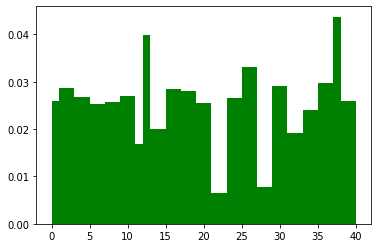

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.bar(range(40), normalized_dominant, 1, color="green", align="edge")

<BarContainer object of 40 artists>

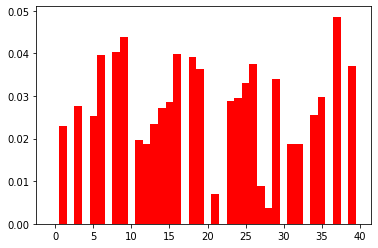

In [51]:
plt.bar(range(40), roi_h, 1, color="red")

When hotels occupy the squares, the game is more complex since there are more high-value squares. 

For high ROI, there is one square that is more valuable than the rest: **Park Place**. **Connecticut Avenue** is in 2nd place. **Vermont Avenue** in 3rd place.

This is what Wikipedia [tells](https://upload.wikimedia.org/wikipedia/commons/e/ed/Monopoly_board_game_graphs.svg) us:

<br />
<center>
<img src = ipynb.images/monopoly-properties.png width = 1000 />
</center>
<br />


Also, if we base it on [this](https://www.ranker.com/list/all-monopoly-properties/steve-wright):

* Connecticut Avenue is the property with the highest ROI in the game. The price to build up is `$370`, and the first time someone lands on your hotel the rent is `$600`. That is a tidy 162% ROI.

* Vermont Avenue: Pros to Owning: Vermont Avenue has the joint second-best ROI in the game (tied with Oriental Avenue), and can be a very important card in causing a housing shortage.

* Park Place: Pros to Owning: The $1,500 rent when fully built up with a hotel can decide games on one turn. Cons to Owning: This is one of the least landed on spots in the game, statistically speaking, and building it up is very, very expensive.

However, look at the green barchart above, the one with no financial considerations. Why is it that JAIL (square #10) does not show the highest occupancy percentage? I am still scratching my head about this. 

For more through analyses of Monopoly strategy go [here](http://thinkcodemake.com/2016/10/14/what-is-the-best-monopoly-property/), and [here](https://en.wikibooks.org/wiki/Monopoly/Strategy).

We had *fun* with this notebook :-) But, the point is that:

* Importance of Linear Algebra in data science, specifically eigenvalue decomposition, to figure out, *analytically and exactly*, the *long-term* (steady-state) behavior of **Markov chains**. Even when systems are not clearly Markovian, a Markovian simplification may yield very *useful* information
* Realize you can MCMC-simulate *processes* just as much as *datasets*

You can apply this analysis to many processes. About 20 years ago, Sergei Brin and Larry Page applied it to the World Wide Web, and went looking for the dominant eigenvector of the World Wide Web because that is the long-term behavior of a surfer that surfs the Web in search for the Web page that is the most pointed-to Web page for the information he is after.

That's right, they went looking for the **dominant eigenvector**, *found it* and became the *richest company in the world*.

<br />
<center>
<img src = "ipynb.images/googlesearch.png" width = 400 />
</center>
<br />

It's crazy to think that math could be so valuable, and that math concepts such as *imaginary numbers*, which are used to evaluate eigenvalues and eigenvectors could have such a concrete application.

But after all, we all know how valuable *Miyazaki's* imaginary friends can be!

<br />
<center>
<img src="ipynb.images/spiritedaway2.jpg" width=500 />
</center>

# 4. Homework

If you did not like your *graph hw*, i'll give you the option of finding a game that is Markovian (or its Markovian approximate), and model it using simulations (many rolls of dice, draw of cards, moves, etc.) like we did in this notebook, *and also* find its dominant eigenvector to verify the long-term behavior of the game. 

<br />
<center>
    <img src="ipynb.images/funngames.jpg", width = 200 />
</center>